# **TECH CHALLENGE - FASE 3**

##### ALEXANDRE DE FARIA    - RM354954
##### MATEUS DE LUCA FERRAZ - RM354803





## **PNAD COVID-19**

### **Importação de bibliotecas Python para manipulação e visualização dos dados**

In [32]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Caminhos dos arquivos fornecidos
file_paths = {
    "home_office_setor": "DAO/home_office_setor.csv",
    "auxilio_atendimento": "DAO/auxilio_atendimento.csv",
    "afastamento_atendimento": "DAO/afastamento_atendimento.csv",
    "cor_atendimento": "DAO/cor_atendimento.csv",
    "sintoma_faixa_etaria": "DAO/sintoma_faixa_etaria.csv",
    "atendimento_por_sintoma": "DAO/atendimento_por_sintoma.csv",
    "todos_os_sintomas": "DAO/todos_os_sintomas.csv",
    "acao_apos_sintoma": "DAO/acao_apos_sintoma.csv",
    "internado_entubado_idade": "DAO/internado_entubado_idade.csv",
    "sintoma_internamento_idade": "DAO/sintoma_internamento_idade.csv",
    "multiplos_sintomas": "DAO/multiplos_sintomas.csv",
    "idade_total": "DAO/idade_total.csv",
    "setores_de_trabalho": "DAO/setores_de_trabalho.csv",
     "renda_total": "DAO/renda_total.csv",
    "carteira_assinada": "DAO/carteira_assinada.csv"
}

# Carregar os arquivos em dataframes
dfs = {name: pd.read_csv(path) for name, path in file_paths.items()}


## **Características clínicas dos sintomas**

#### Objetivo: Realizar o mapeamento dos dados apresentados para analise dos sintomas adquiridos pela população afetada, quais sintomas são mais comuns, quais são as primeiras ações da população após a percepção dos sintomas entre outros.

#### A análise mostrou que muitos enfrentaram sintomas como febre, tosse e dificuldade de respirar — sinais preocupantes que podem indicar a presença do vírus. Além disso, vimos que algumas pessoas buscaram ajuda médica imediatamente, enquanto outras optaram por ficar em casa ou tomar medicamentos por conta própria. Isso nos ajuda a entender o comportamento das pessoas frente ao medo e incertezas trazidos pela pandemia, bem como os desafios que elas enfrentaram para acessar o sistema de saúde.

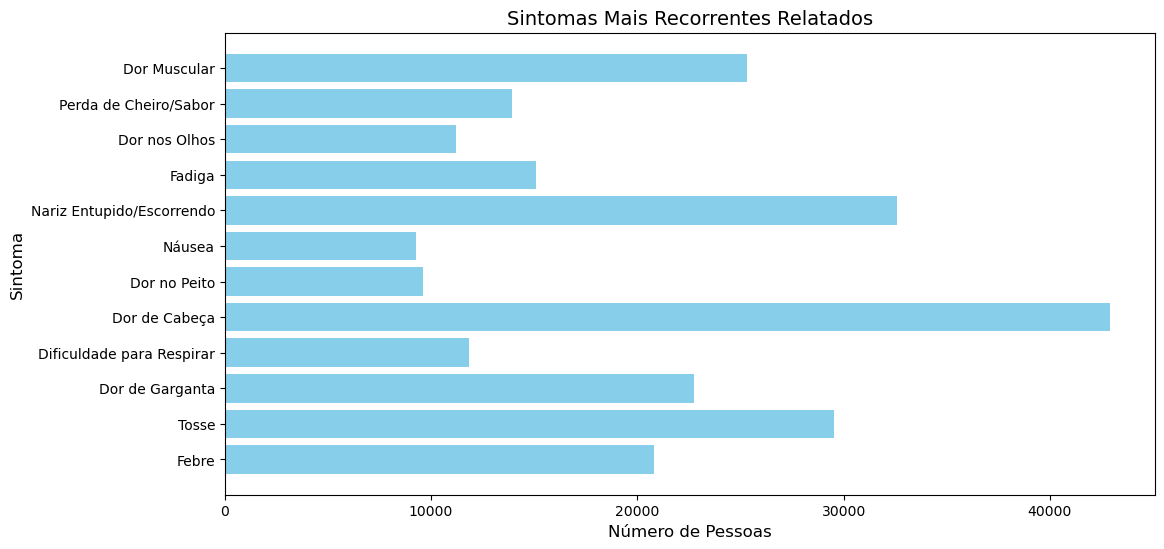

In [36]:
# Criar um gráfico de barras para os sintomas mais recorrentes
df_sintomas = dfs["todos_os_sintomas"]
# Extrair os dados de sintomas e suas contagens
sintomas = ['Febre', 'Tosse', 'Dor de Garganta', 'Dificuldade para Respirar', 'Dor de Cabeça', 
            'Dor no Peito', 'Náusea', 'Nariz Entupido/Escorrendo', 'Fadiga', 'Dor nos Olhos', 
            'Perda de Cheiro/Sabor', 'Dor Muscular']

valores = [
    df_sintomas['febre'][0], 
    df_sintomas['tosse'][0], 
    df_sintomas['dor_de_garganta'][0], 
    df_sintomas['dificuldade_para_respirar'][0], 
    df_sintomas['dor_de_cabeca'][0], 
    df_sintomas['dor_no_peito'][0], 
    df_sintomas['nausea'][0], 
    df_sintomas['nariz_entupido_ou_escorrendo'][0], 
    df_sintomas['fadiga'][0], 
    df_sintomas['dor_nos_olhos'][0], 
    df_sintomas['perda_de_cheiro_ou_sabor'][0], 
    df_sintomas['dor_muscular'][0]
]

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.barh(sintomas, valores, color='skyblue')

# Adicionando títulos e rótulos
plt.title("Sintomas Mais Recorrentes Relatados", fontsize=14)
plt.xlabel("Número de Pessoas", fontsize=12)
plt.ylabel("Sintoma", fontsize=12)

# Mostrar o gráfico
plt.show()



Text(0, 0.5, 'Número de Pessoas')

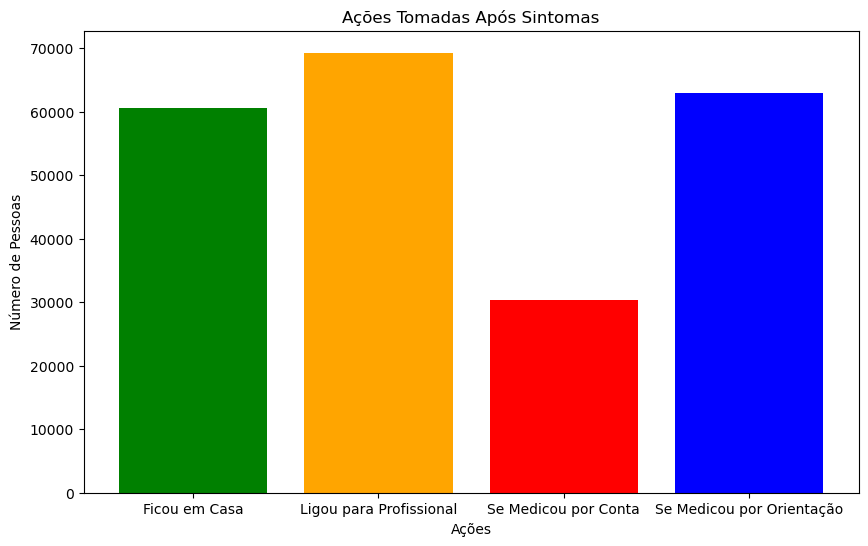

In [34]:
df_acao_apos_sintoma = dfs["acao_apos_sintoma"]


fig, ax = plt.subplots(figsize=(10, 6))
acoes = ['Ficou em Casa', 'Ligou para Profissional', 'Se Medicou por Conta', 'Se Medicou por Orientação']
valores = [df_acao_apos_sintoma[col].iloc[0] for col in df_acao_apos_sintoma.columns]
ax.bar(acoes, valores, color=['green', 'orange', 'red', 'blue'])
plt.title('Ações Tomadas Após Sintomas')
plt.xlabel('Ações')
plt.ylabel('Número de Pessoas')

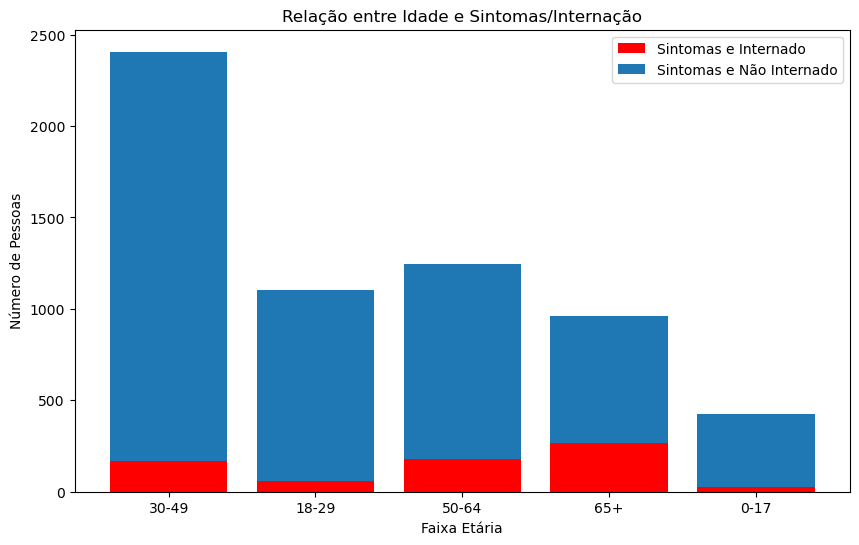

In [35]:
df_sintoma_internamento_idade = dfs["sintoma_internamento_idade"]

plt.figure(figsize=(10, 6))
plt.bar(df_sintoma_internamento_idade['faixa_etaria'], df_sintoma_internamento_idade['total_sintomas_e_internado'], label='Sintomas e Internado', color = 'red')
plt.bar(df_sintoma_internamento_idade['faixa_etaria'], df_sintoma_internamento_idade['total_sintomas_e_nao_internado'], bottom=df_sintoma_internamento_idade['total_sintomas_e_internado'], label='Sintomas e Não Internado')
plt.title('Relação entre Idade e Sintomas/Internação')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')
plt.legend()

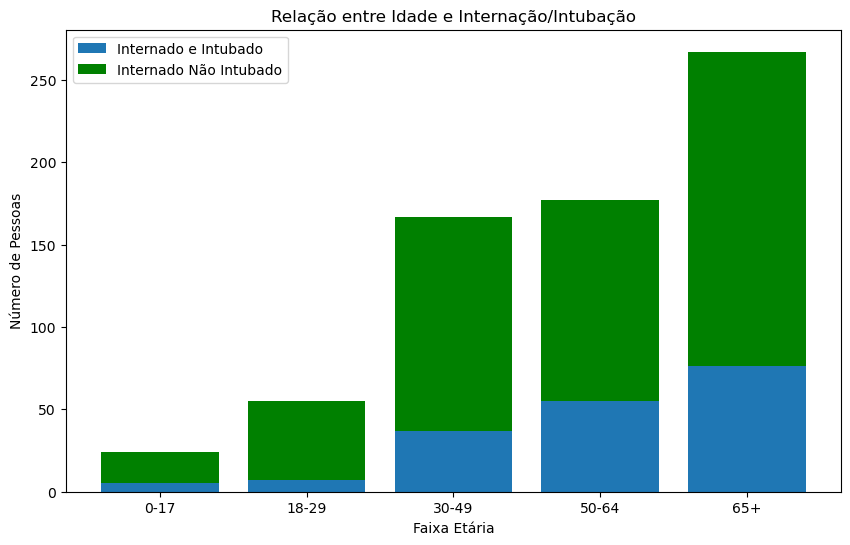

In [33]:
df_internado_entubado_idade = dfs["internado_entubado_idade"]

plt.figure(figsize=(10, 6))
plt.bar(df_internado_entubado_idade['faixa_etaria'], df_internado_entubado_idade['internado_entubado'], label='Internado e Intubado')
plt.bar(df_internado_entubado_idade['faixa_etaria'], df_internado_entubado_idade['internado_nao_entubado'], bottom=df_internado_entubado_idade['internado_entubado'], label='Internado Não Intubado', color = 'green')
plt.title('Relação entre Idade e Internação/Intubação')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')
plt.legend()

## **Características da população**

#### Objetivo: conhecer melhor quem são as pessoas que participaram da pesquisa, isso é importante para compreender quais grupos foram mais atingidos. Estamos olhando para dados como a faixa etária, o gênero e a cor das pessoas, para identificar como essas características influenciaram. Os dados revelaram que a maior parte dos entrevistados estava na faixa dos 30 a 49 anos, que são a maioria no mercado de trabalho. 

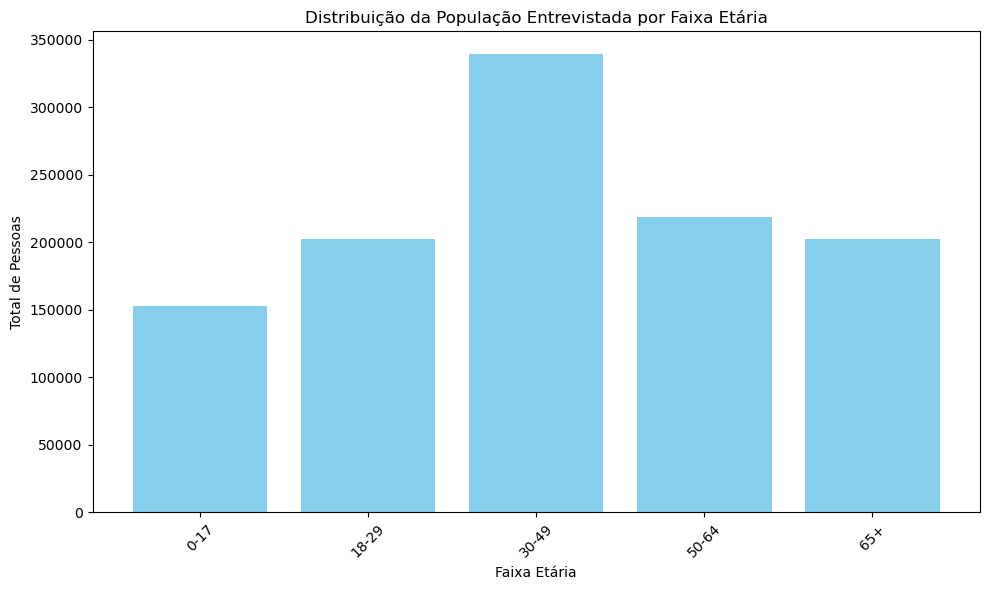

In [37]:
df_idade_total = dfs["idade_total"].dropna()

# Plotar gráfico de barras para faixa etária e total da população
plt.figure(figsize=(10, 6))
plt.bar(df_idade_total['faixa_etaria'], df_idade_total['total_pessoas'], color='skyblue')
plt.title('Distribuição da População Entrevistada por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Pessoas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


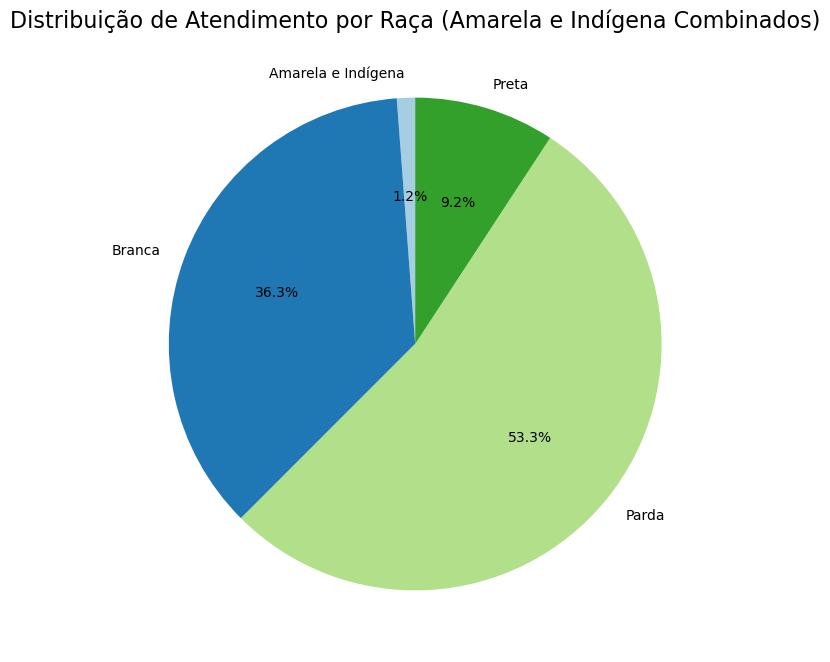

In [38]:
# Carregar o DataFrame "cor_atendimento"
df_cor_atendimento = dfs["cor_atendimento"]

# Mapeamento de raças para os códigos de a004
raca_map = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena'
}

# Mapear os códigos de raça para os nomes correspondentes
df_cor_atendimento['cor_raca_nome'] = df_cor_atendimento['cor_raca'].map(raca_map)

# Remover quaisquer valores NaN (caso existam)
df_cor_atendimento = df_cor_atendimento.dropna(subset=['cor_raca_nome'])

# Combinar os valores de "Amarela" e "Indígena" em um único grupo
df_cor_atendimento.loc[df_cor_atendimento['cor_raca_nome'].isin(['Amarela', 'Indígena']), 'cor_raca_nome'] = 'Amarela e Indígena'

# Reagrupar os dados para somar os valores combinados
df_agrupado = df_cor_atendimento.groupby('cor_raca_nome').sum()

# Somar o total de pessoas que procuraram atendimento
total_atendimento = df_agrupado['total_procurou_atendimento'].sum()

# Calcular a porcentagem de atendimento por raça com base no total de pessoas que procuraram atendimento
df_agrupado['pct_atendimento'] = (df_agrupado['total_procurou_atendimento'] / total_atendimento) * 100

# Criar o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(df_agrupado['pct_atendimento'], labels=df_agrupado.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Atendimento por Raça (Amarela e Indígena Combinados)', fontsize=16)

# Mostrar o gráfico
plt.show()

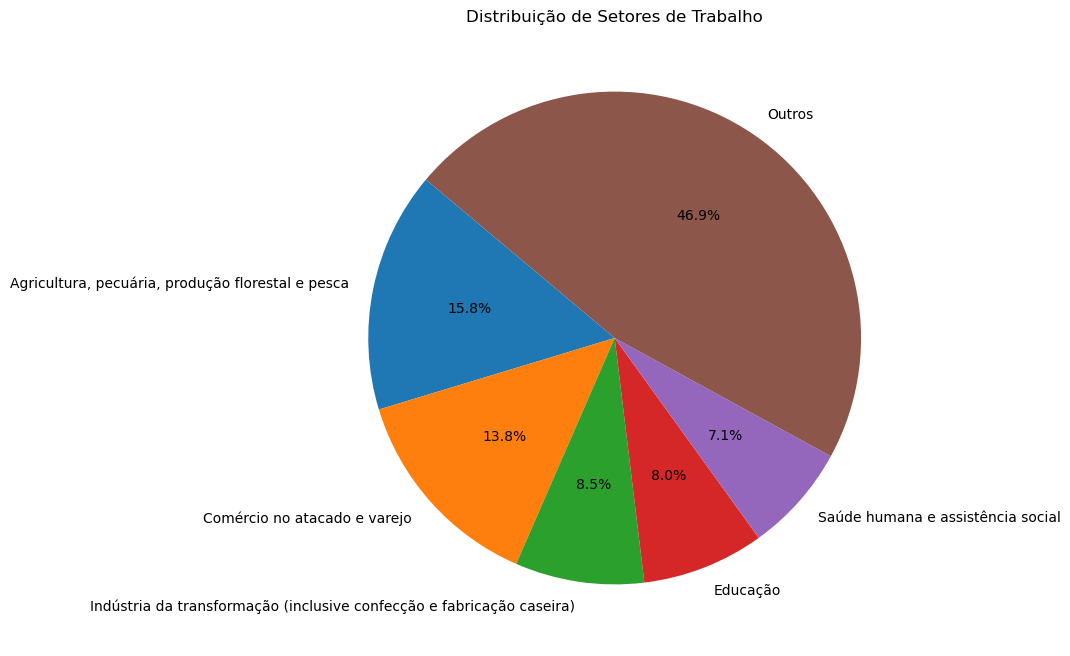

In [39]:
df_setores_de_trabalho = dfs["setores_de_trabalho"].dropna()

# Repetir o processo de agrupamento e geração do gráfico sem NaN
top_5_setores = df_setores_de_trabalho.nlargest(5, 'total_pessoas')
outros_setores = pd.DataFrame([{
    'atividade_principal': 'Outros',
    'total_pessoas': df_setores_de_trabalho['total_pessoas'].sum() - top_5_setores['total_pessoas'].sum()
}])

# Combinar os top 5 setores com 'Outros'
df_setores_agrupados = pd.concat([top_5_setores, outros_setores])

# Plot do gráfico de pizza sem NaN
plt.figure(figsize=(8, 8))
plt.pie(df_setores_agrupados['total_pessoas'], labels=df_setores_agrupados['atividade_principal'], autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Setores de Trabalho')
plt.show()

## **Características econômicas da sociedade**

#### A pandemia trouxe grandes impactos econômicos, afetando o trabalho e a renda de muitas pessoas. Ao analisar esses dados, vemos que uma parte significativa dos trabalhadores tem carteira assinada ou é servidor público, o que lhes garantiu mais segurança. Por outro lado, muitos trabalhadores informais enfrentaram maiores dificuldades.

#### Esses dados nos mostram como a crise aprofundou desigualdades já existentes e reforçam a importância de políticas públicas para proteger os mais vulneráveis em momentos de crise.

C:\Users\mateus.ferraz\AppData\Local\Temp\ipykernel_9296\3105056207.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setores_relevantes.loc['Outros'] = outros


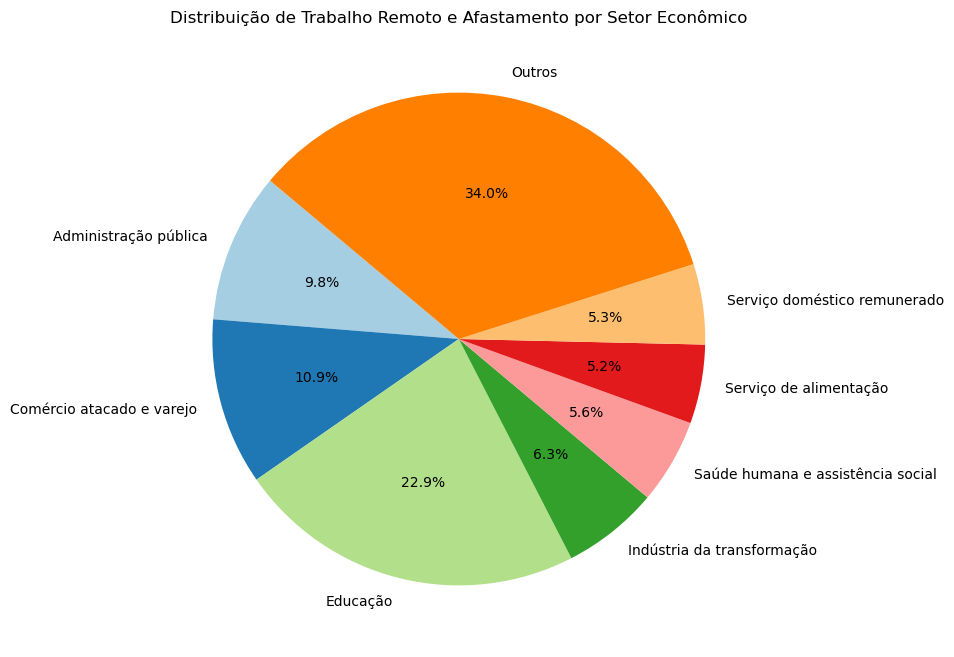

In [40]:
# Filtrando dados para eliminar valores nulos
df_home_office_setor = dfs["home_office_setor"].dropna()



# Mapear os códigos de c007d para os setores econômicos de acordo com a lista fornecida
setores_map = {
    1: 'Agricultura, pecuária, pesca',
    2: 'Extração de petróleo e minerais',
    3: 'Indústria da transformação',
    4: 'Fornecimento de eletricidade e saneamento',
    5: 'Construção',
    6: 'Comércio atacado e varejo',
    7: 'Reparação de veículos',
    8: 'Transporte de passageiros',
    9: 'Transporte de mercadorias',
    10: 'Armazenamento e correios',
    11: 'Hospedagem',
    12: 'Serviço de alimentação',
    13: 'Informação e comunicação',
    14: 'Bancos e seguros',
    15: 'Atividades imobiliárias',
    16: 'Advocacia, engenharia, publicidade',
    17: 'Locação de mão de obra e segurança',
    18: 'Administração pública',
    19: 'Educação',
    20: 'Saúde humana e assistência social',
    21: 'Organizações religiosas',
    22: 'Atividades artísticas e esportivas',
    23: 'Cabeleireiros e serviços pessoais',
    24: 'Serviço doméstico remunerado'
}

# Carregar o arquivo CSV do setor
df_home_office_setor = pd.read_csv('DAO/home_office_setor.csv')

# Substituir os códigos pelos nomes dos setores
df_home_office_setor['setor_economico_nome'] = df_home_office_setor['setor_economico'].map(setores_map)

# Agrupar os setores mais relevantes e categorizar os menos relevantes como "Outros"
df_agrupado = df_home_office_setor.groupby('setor_economico_nome').sum()

# Somar os valores de trabalho remoto e afastados
df_agrupado['total_trabalhadores'] = df_agrupado['total_home_office'] + df_agrupado['total_afastados']

# Calcular o percentual de cada setor
df_agrupado['percentual'] = (df_agrupado['total_trabalhadores'] / df_agrupado['total_trabalhadores'].sum()) * 100

# Criar a categoria "Outros" para setores com menos de 5%
setores_relevantes = df_agrupado[df_agrupado['percentual'] >= 5]
outros = df_agrupado[df_agrupado['percentual'] < 5].sum()

# Adicionar "Outros" aos setores relevantes
setores_relevantes.loc['Outros'] = outros

# Preparar os dados para o gráfico de pizza
labels = setores_relevantes.index
valores = setores_relevantes['total_trabalhadores']

# Criar o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title("Distribuição de Trabalho Remoto e Afastamento por Setor Econômico")
plt.show()



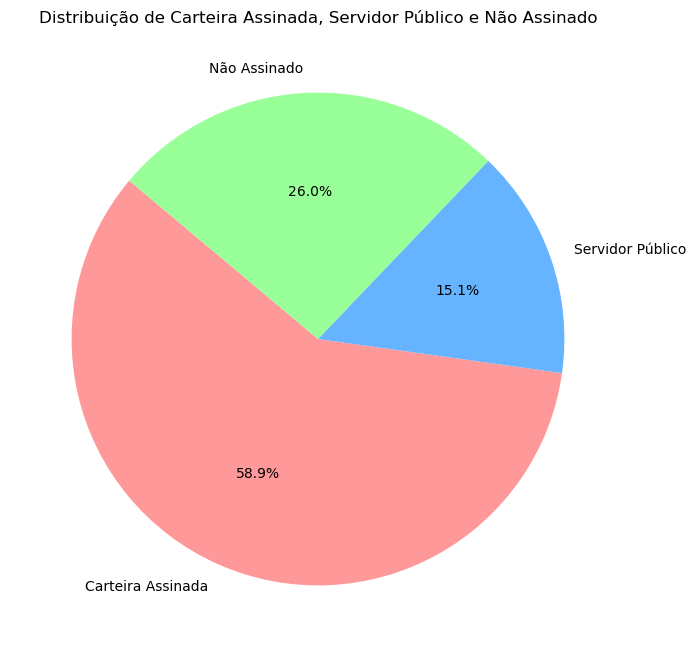

In [43]:
# Gráfico: Distribuição de Carteira Assinada, Servidor Público e Não Assinado
df_carteira_assinada_values = dfs['carteira_assinada'].iloc[0]  # Usar a primeira linha de dados
labels_carteira = ['Carteira Assinada', 'Servidor Público', 'Não Assinado']
values_carteira = [
    df_carteira_assinada_values['percentual_carteira_assinada'],
    df_carteira_assinada_values['percentual_servidor_publico'],
    df_carteira_assinada_values['percentual_nao_assinado']
]

# Definir cores personalizadas
colors_carteira = ['#FF9999', '#66B3FF', '#99FF99']  # Cores: vermelho claro, azul claro, verde claro

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(values_carteira, labels=labels_carteira, autopct='%1.1f%%', startangle=140, colors=colors_carteira)
plt.title('Distribuição de Carteira Assinada, Servidor Público e Não Assinado')
plt.show()

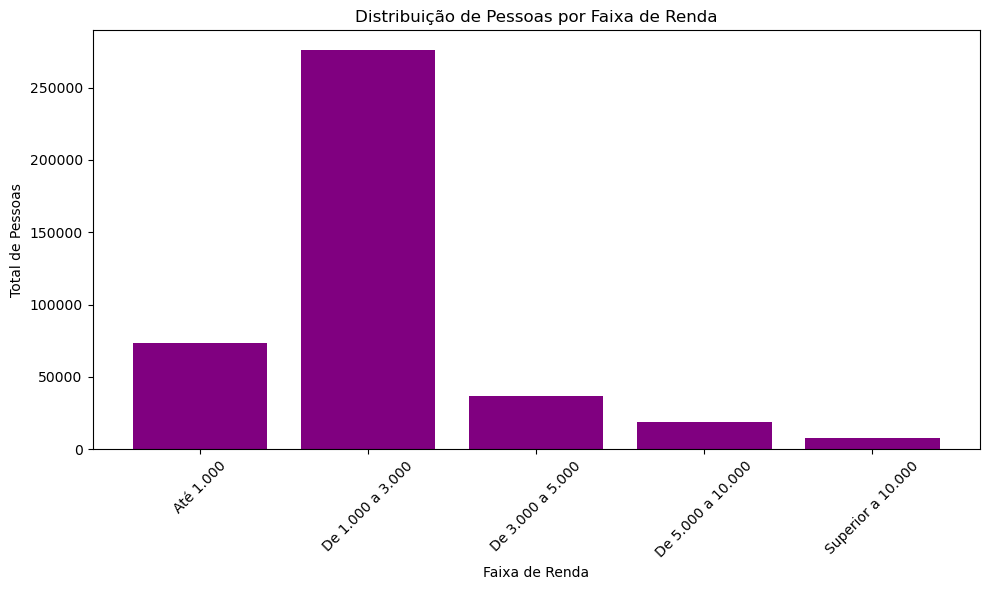

In [42]:
# Gráfico 2: Distribuição de Faixa de Renda
df_renda_total = dfs['renda_total']  # Ler os dados do arquivo de faixa de renda

plt.figure(figsize=(10, 6))
plt.bar(df_renda_total['faixa_renda'], df_renda_total['total_pessoas'], color='purple')
plt.title('Distribuição de Pessoas por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Total de Pessoas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## **Conclusão da Análise**


#### Com base nos dados, foi possível identificar os sintomas mais comuns (como febre e tosse) e a reação das pessoas ao perceber esses sinais. Também analisamos como diferentes faixas etárias e condições econômicas impactaram o acesso aos serviços de saúde, revelando desigualdades importantes. Isso nos permitiu ter uma imagem clara de quem foi mais afetado e de como os recursos de saúde foram utilizados.

### **Ações para o Hospital em Caso de Novo Surto**
#### Se ocorrer um novo surto de COVID-19, as seguintes ações deverão ser tomadas pelo hospital:

#### **Reforçar a triagem de sintomas**: Como febre, tosse e dificuldade respiratória foram os sintomas mais comuns, é necessário fortalecer a triagem inicial para identificar casos de forma precoce.

#### **Expandir o atendimento remoto**: Durante a pandemia, muitas pessoas recorreram ao atendimento remoto. O hospital deve continuar e investir nesse serviço para permitir que os pacientes com sintomas leves recebam orientação sem precisar ir ao hospital.

#### **Aprimorar o suporte a grupos vulneráveis**: Pessoas sem vínculos formais de trabalho e com menores rendas foram as mais afetadas. O hospital deve garantir que esses grupos tenham acesso facilitado aos cuidados de saúde, incluindo a possibilidade de transporte gratuito ou auxílio para medicamentos.

#### **Preparar infraestrutura para internação**: Com um alto número de internações em surtos anteriores, o hospital precisa garantir que haja leitos suficientes e recursos como ventiladores disponíveis para pacientes graves.

